**Imports**

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats as st
import read_data as rd

**Read Data**

In [97]:
import read_data as rd
filenames = ["KevinYeData.txt",
             "PatrickQData.txt",
             "TamaHoareData.txt",
             "dataviviandong.txt"]
results = rd.ReadData(filenames=filenames)
AllArrivals = results[0]
AllServices = results[1]

**Methods**

In [98]:
#DETERMINING BINS FOR HISTOGRAM
def bin(m):
    q25, q75 = np.percentile(m, [25, 75])
    bin_width = 2 * (q75 - q25) * len(m) ** (-1/3)
    bins = round((max(m) - min(m)) / bin_width)
    return bins

In [138]:
#Pass the data to this method to plot it
def Histogram(data):
    #Plot
    plt.hist(data, density = True, bins = bin(data), label = "Data", rwidth = 0.9)
    mn, mx = plt.xlim()
    plt.xlim(mn, mx)
    

## Results

**Data and Frequencies**

None


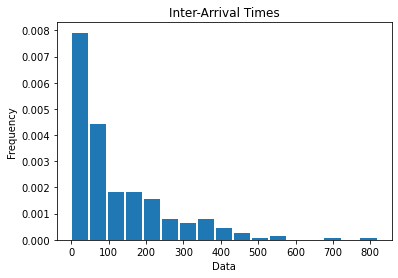

In [139]:
title = "Inter-Arrival Times"
plotArrival = Histogram(AllArrivals)

plt.ylabel("Frequency")
plt.xlabel("Data")
plt.title(title);

print(plotArrival)

None


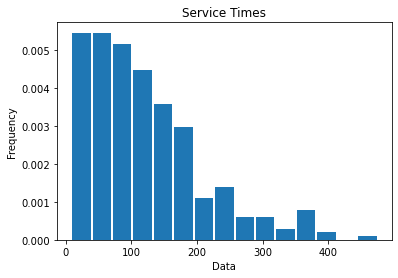

In [140]:
title = "Service Times"
plotService = Histogram(AllServices)

plt.ylabel("Frequency")
plt.xlabel("Data")
plt.title(title);

print(plotService)

**With Betterment of fit**

From our analysis, it suggests that Pearson3 is the best in approximating ‘inter-arrival time’ Data. This analysis is shown below:

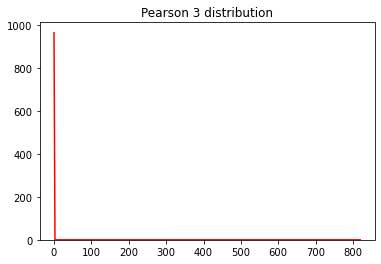

In [167]:
##Inter-Arrivals
#Plot Histogram
title = "Inter-Arrival Times"
plotArrival = Histogram(AllArrivals)


#Plot Best Fit Distribution
Arrmin, Arrmax = min(AllArrivals), max(AllArrivals)  

lnspcArr = np.linspace(Arrmin, Arrmax, len(AllArrivals)) #For arrivals

ap, bp, cp = st.pearson3.fit(AllArrivals)
pdf_pearson = st.pearson3.pdf(lnspcArr, ap, bp, cp)  

plt.title('Pearson 3 distribution')
plt.plot(lnspcArr, pdf_pearson, 'r-')#,x,pdf,'b--')
#plt.plot(AllArrivals, pdf_pearson, label="Pearson")

For our 'service times' data, it suggests that beta distribution is the best fit for the data. This analysis is shown below:

C:\Users\64210\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


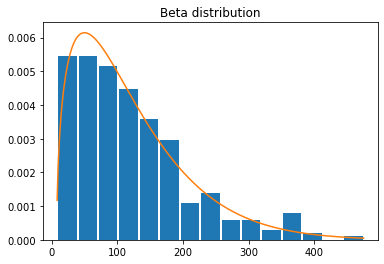

In [168]:
#Service Times
#plot Histogram
title = "Service Times"
plotService = Histogram(AllServices)


#Plot Best Fit Distribution
Sermin, Sermax = min(AllServices), max(AllServices)  

lnspcSer = np.linspace(Sermin, Sermax, len(AllServices))#For Services

ab,bb,cb,db = st.beta.fit(AllServices)  #Fitting
pdf_beta = st.beta.pdf(lnspcSer, ab, bb,cb, db)  

plt.title('Beta distribution')
plt.plot(lnspcSer, pdf_beta, label="Beta")